In [ ]:
!pip install Orange3

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.3/535.3 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.3/270.3 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.7/125.7 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.0/95.0 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/6

In [ ]:
import Orange
Orange.__version__

'3.39.0'

---

Reconecte ao Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
DRIVE_DIRECTORY = "curso_ml"
DRIVE_DIRECTORY = os.path.join("/content/drive/MyDrive", DRIVE_DIRECTORY)

---

In [ ]:
import pickle

from collections import Counter

import pandas as pd
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Regras

Para gerar regras, nós precisamos começar com o arquivo com os dados originais, `cov_types.csv`, que deve estar salvo na sua pasta do Drive.

Primeiro recarregue esse arquivo com o Pandas.

In [ ]:
base = pd.read_csv(os.path.join(DRIVE_DIRECTORY, "cov_types.csv"))
base

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
0,2767.0,66.0,17.0,210.0,18.0,1190.0,234.0,204.0,96.0,2251.0,2,30,Lodgepole Pine
1,2724.0,160.0,19.0,60.0,4.0,1350.0,236.0,240.0,127.0,2514.0,2,16,Lodgepole Pine
2,2360.0,65.0,7.0,127.0,21.0,1377.0,227.0,226.0,134.0,339.0,3,5,Ponderosa Pine
3,2995.0,45.0,4.0,285.0,30.0,5125.0,221.0,231.0,146.0,5706.0,0,11,Lodgepole Pine
4,2400.0,106.0,27.0,150.0,63.0,342.0,253.0,196.0,51.0,811.0,2,3,Ponderosa Pine
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2917.0,90.0,9.0,247.0,25.0,4095.0,235.0,225.0,121.0,3901.0,0,28,Lodgepole Pine
9996,3015.0,38.0,8.0,361.0,74.0,4846.0,220.0,223.0,138.0,1611.0,0,28,Lodgepole Pine
9997,3052.0,79.0,19.0,90.0,11.0,1003.0,241.0,203.0,85.0,1490.0,2,22,Spruce/Fir
9998,2958.0,58.0,6.0,319.0,19.0,2468.0,225.0,227.0,137.0,2280.0,0,28,Lodgepole Pine


Agora, lembre-se que a coluna com a classe deve ser indicada pelo prefixo `c#`. Então, vamos renomear a coluna `Cover_Type` para ficar neste formato.

In [ ]:
base.rename(columns={"Cover_Type": "c#Cover_Type"}, inplace=True)
base

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,c#Cover_Type
0,2767.0,66.0,17.0,210.0,18.0,1190.0,234.0,204.0,96.0,2251.0,2,30,Lodgepole Pine
1,2724.0,160.0,19.0,60.0,4.0,1350.0,236.0,240.0,127.0,2514.0,2,16,Lodgepole Pine
2,2360.0,65.0,7.0,127.0,21.0,1377.0,227.0,226.0,134.0,339.0,3,5,Ponderosa Pine
3,2995.0,45.0,4.0,285.0,30.0,5125.0,221.0,231.0,146.0,5706.0,0,11,Lodgepole Pine
4,2400.0,106.0,27.0,150.0,63.0,342.0,253.0,196.0,51.0,811.0,2,3,Ponderosa Pine
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2917.0,90.0,9.0,247.0,25.0,4095.0,235.0,225.0,121.0,3901.0,0,28,Lodgepole Pine
9996,3015.0,38.0,8.0,361.0,74.0,4846.0,220.0,223.0,138.0,1611.0,0,28,Lodgepole Pine
9997,3052.0,79.0,19.0,90.0,11.0,1003.0,241.0,203.0,85.0,1490.0,2,22,Spruce/Fir
9998,2958.0,58.0,6.0,319.0,19.0,2468.0,225.0,227.0,137.0,2280.0,0,28,Lodgepole Pine


Salve o arquivo modificado. Como você só vai utilizar este arquivo neste exercício, não precisa salvar no Drive.

In [ ]:
base.to_csv('cov_types.csv', index=False)

Gere uma instância da classe `Orange.data.Table` informando o arquivo `csv` contendo os dados.

In [ ]:
base = Orange.data.Table('cov_types.csv')

Exiba o domínio desta base.

In [ ]:
base.domain

[Elevation, Aspect, Slope, Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Roadways, Hillshade_9am, Hillshade_Noon, Hillshade_3pm, Horizontal_Distance_To_Fire_Points, Wilderness_Area, Soil_Type | Cover_Type]

Utilize o método adequado da biblioteca Orange para separar 25% dos dados da base em um split de teste, e o restante em um split de treinamento. Você pode salvar o resultado da função diretamente nas variáveis dos splits correspondentes, observando que o split de teste é retornado primeiro.

In [ ]:
base_test, base_train = Orange.evaluation.testing.sample(base, n=0.25)

Verifique o tamanho desses splits.

In [ ]:
len(base_train), len(base_test)

(7500, 2500)

Instancie e ajuste um classificador do tipo `CN2Learner`.

In [ ]:
cn2_classifier = Orange.classification.rules.CN2Learner()
rules = cn2_classifier(base_train)

Observe que, como esta base é maior, o número de regras é bastante elevado:

In [ ]:
len(rules.rule_list)

1616

Então, vamos visualizar somente as 10 primeiras regras:

In [ ]:
for i, rule in enumerate(rules.rule_list):
    print(rule)
    if i == 10:
        break

IF Horizontal_Distance_To_Roadways>=6470.0 THEN Cover_Type=Lodgepole Pine 
IF Horizontal_Distance_To_Fire_Points>=4149.0 AND Hillshade_9am>=254.0 THEN Cover_Type=Aspen 
IF Elevation>=3362.0 AND Elevation>=3698.0 THEN Cover_Type=Krummholz 
IF Elevation>=3047.0 AND Horizontal_Distance_To_Fire_Points>=5044.0 THEN Cover_Type=Spruce/Fir 
IF Horizontal_Distance_To_Fire_Points>=5028.0 AND Horizontal_Distance_To_Fire_Points>=6851.0 THEN Cover_Type=Spruce/Fir 
IF Horizontal_Distance_To_Fire_Points>=5028.0 AND Horizontal_Distance_To_Fire_Points<=5162.0 AND Slope>=3.0 THEN Cover_Type=Lodgepole Pine 
IF Elevation>=3362.0 AND Horizontal_Distance_To_Roadways>=4133.0 AND Elevation>=3400.0 THEN Cover_Type=Krummholz 
IF Horizontal_Distance_To_Fire_Points>=2621.0 AND Vertical_Distance_To_Hydrology>=207.0 AND Elevation>=3116.0 THEN Cover_Type=Spruce/Fir 
IF Horizontal_Distance_To_Fire_Points>=4147.0 AND Elevation<=2709.0 AND Aspect>=93.0 THEN Cover_Type=Lodgepole Pine 
IF Soil_Type>=34.0 AND Hillshade_3p

Faça predições informando ao algoritmo a base de teste.

In [ ]:
y_pred = rules(base_test)
y_pred

array([4, 4, 6, ..., 4, 6, 6])

Observe que nós podemos recuperar os valores reais através do atributo `Y` de `base_test`.

In [ ]:
y_test = base_test.Y
y_test

array([4., 6., 6., ..., 6., 6., 6.])

Utilize este valor para calcular a acurácia do modelo.

In [ ]:
accuracy_score(y_test, y_pred)

0.6668

Desta vez você deve utilizar a função `confusion_matrix` do `sklearn` para exibir a matriz de confusão no formato de um array. Esta função recebe primeiro os valores reais, depois os valores preditos.

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[  4,   0,   2,   0,  29,   1,  10],
       [  0,  10,   1,   0,   0,   0,   0],
       [  1,   0,  20,   0,  16,  28,   7],
       [  0,   0,   0,  62,   0,   0,  46],
       [ 23,   1,  17,   0, 877,  22, 255],
       [  5,   3,  20,   0,  20,  97,   4],
       [  1,   0,   3,  26, 290,   2, 597]])

Você pode gerar um gráfico da matriz de confusão similar ao do yellowbrick com a função `sns.heatmap`:

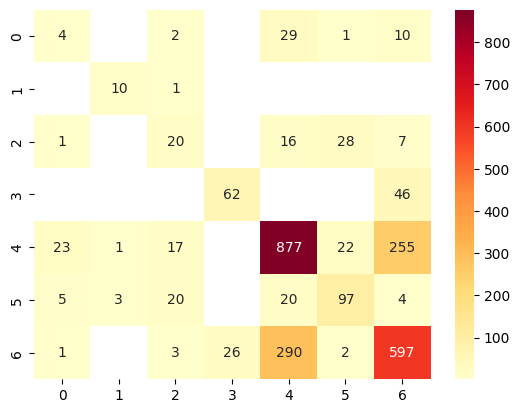

In [ ]:
sns.heatmap(cm,
            annot=True, # para exibir as contagens nas células do gráfico
            fmt='d', # para que os valores sejam em formato inteiro
            cmap='YlOrRd', # o mesmo mapa de cor do yellowbrick
            mask = (cm == 0) # não exibe os valores e a cor onde o valor for igual a 0
            );

Exiba o reporte de classificação do modelo.

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.12      0.09      0.10        46
         1.0       0.71      0.91      0.80        11
         2.0       0.32      0.28      0.30        72
         3.0       0.70      0.57      0.63       108
         4.0       0.71      0.73      0.72      1195
         5.0       0.65      0.65      0.65       149
         6.0       0.65      0.65      0.65       919

    accuracy                           0.67      2500
   macro avg       0.55      0.55      0.55      2500
weighted avg       0.66      0.67      0.66      2500



## Classificador base (majority learner)

Implemente um classificador do tipo `MajorityLearner`.

In [ ]:
majority = Orange.classification.MajorityLearner()

Faça predições para a base inteira com base nesse classificador.

In [ ]:
y_test = Orange.evaluation.testing.TestOnTestData(base, base, [majority])

Exiba a acurácia deste classificador.

In [ ]:
Orange.evaluation.CA(y_test)[0]

np.float64(0.4847)

Exiba o número de registros em cada classe na base inteira.

In [ ]:
Counter(str(instance.get_class()) for instance in base)

Counter({'Lodgepole Pine': 4847,
         'Ponderosa Pine': 581,
         'Spruce/Fir': 3714,
         'Aspen': 163,
         'Douglas-fir': 278,
         'Krummholz': 362,
         'Cottonwood/Willow': 55})

Veja que a base tem 10 mil registros:

In [ ]:
len(base)

10000

Isso significa que a classe majoritária, *Lodgepole Pine*, representa $4847/10000=0.4847\%$ dos dados, ou seja, exatamente a acurácia alcançada pelo classificador base do tipo *majority learner*.